In [1]:
# Analyze titanic dataset and prepare ML Model to predict the passanger Survival


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib

In [3]:
# import libraries for label encoding
from sklearn.preprocessing import LabelEncoder

In [4]:
# import library for train test split
from sklearn.model_selection import train_test_split

In [5]:
# import libraries for performance metrices
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix,classification_report


In [6]:
df = pd.read_csv("Titanic-Dataset.csv")

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
 df.shape

(891, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.isna().sum(axis = 0)

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [11]:
df["Pclass"].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [12]:
# divide into independent and dependent variables
X = df[["Pclass","Age","Sex","SibSp","Parch","Fare"]]
y = df["Survived"]

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     714 non-null    float64
 2   Sex     891 non-null    object 
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [14]:
# handling missing values in age column
X['Age'] = X['Age'].fillna(X["Age"].mean())

/tmp/ipython-input-14-2812509704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = X['Age'].fillna(X["Age"].mean())


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   Sex     891 non-null    object 
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [16]:
X.head()

,Pclass,Age,Sex,SibSp,Parch,Fare
0,3,22.0,male,1,0,7.2500
1,1,38.0,female,1,0,71.2833
2,3,26.0,female,0,0,7.9250
3,1,35.0,female,1,0,53.1000
4,3,35.0,male,0,0,8.0500


In [17]:
# label encoding on column
encoder = LabelEncoder()
X["Sex"] = encoder.fit_transform(X["Sex"])

/tmp/ipython-input-17-1224611411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex"] = encoder.fit_transform(X["Sex"])


In [18]:
X.head()

,Pclass,Age,Sex,SibSp,Parch,Fare
0,3,22.0,1,1,0,7.2500
1,1,38.0,0,1,0,71.2833
2,3,26.0,0,0,0,7.9250
3,1,35.0,0,1,0,53.1000
4,3,35.0,1,0,0,8.0500


In [19]:
# dividing the dataset into training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [20]:
# Dictionary of Model for model setup
models = {
    "Logistic Regression" : LogisticRegression(),
    "Support Vector Machine" : SVC(),
    "Naive Bayes" : GaussianNB(),
    "k-nearest Neighbours" : KNeighborsClassifier(),
    "Decision Trees" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier()
}

classification report
[[90 16]
 [20 53]]
Summary of all the Models
                 Model  Accuracy  Precision    Recall
0  Logistic Regression  0.798883   0.768116  0.726027


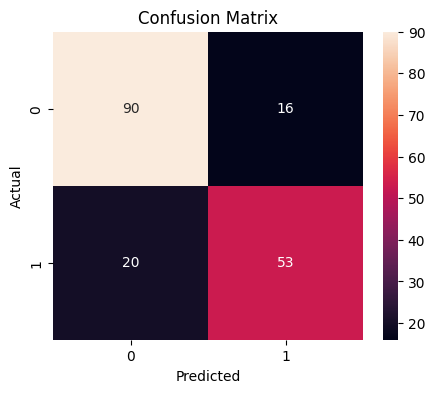

<Figure size 1200x800 with 0 Axes>

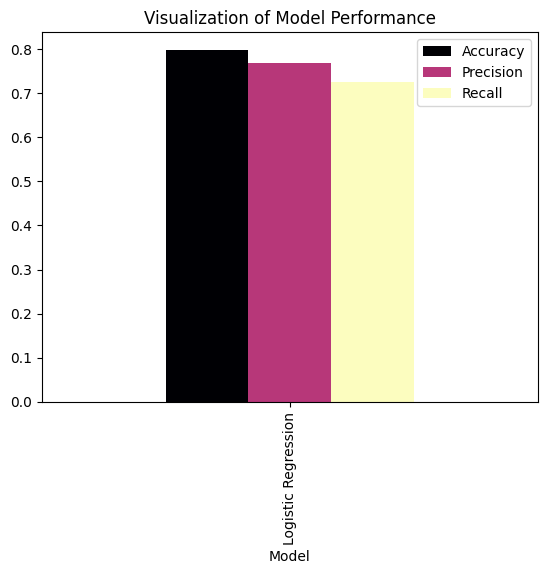

classification report
[[96 10]
 [52 21]]
Summary of all the Models
                    Model  Accuracy  Precision    Recall
0     Logistic Regression  0.798883   0.768116  0.726027
1  Support Vector Machine  0.653631   0.677419  0.287671


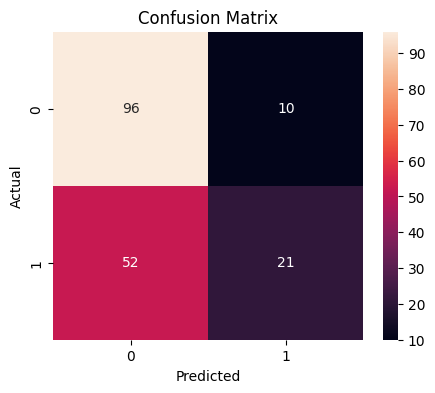

<Figure size 1200x800 with 0 Axes>

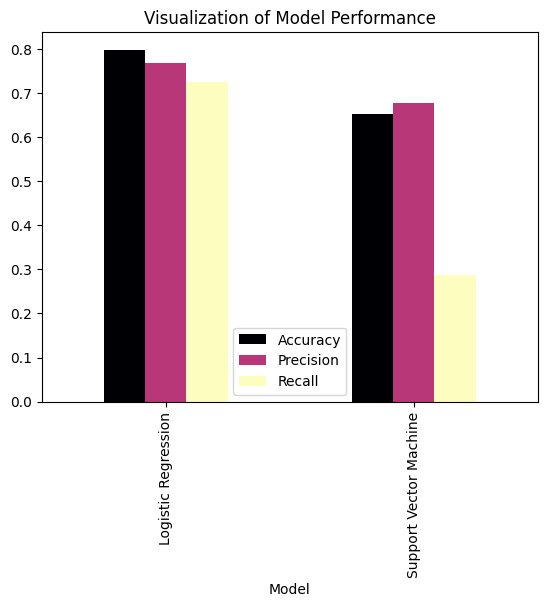

classification report
[[89 17]
 [26 47]]
Summary of all the Models
                    Model  Accuracy  Precision    Recall
0     Logistic Regression  0.798883   0.768116  0.726027
1  Support Vector Machine  0.653631   0.677419  0.287671
2             Naive Bayes  0.759777   0.734375  0.643836


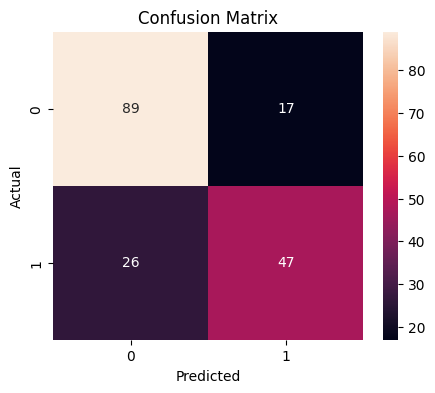

<Figure size 1200x800 with 0 Axes>

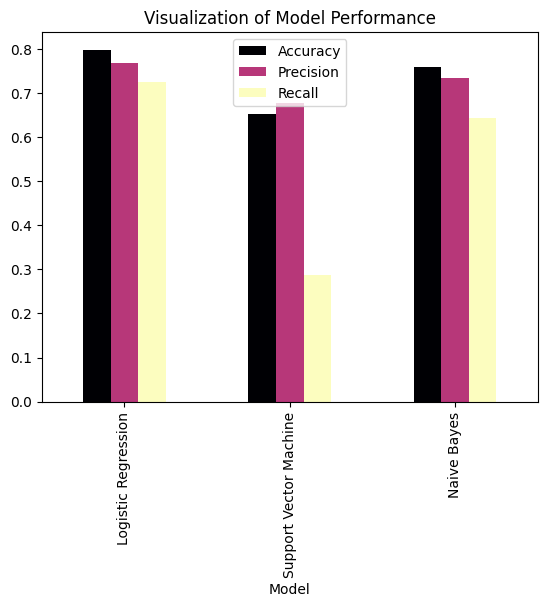

classification report
[[88 18]
 [33 40]]
Summary of all the Models
                    Model  Accuracy  Precision    Recall
0     Logistic Regression  0.798883   0.768116  0.726027
1  Support Vector Machine  0.653631   0.677419  0.287671
2             Naive Bayes  0.759777   0.734375  0.643836
3    k-nearest Neighbours  0.715084   0.689655  0.547945


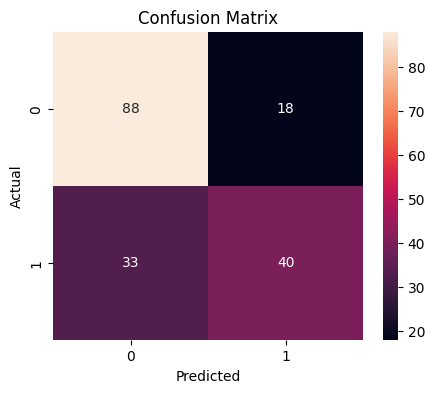

<Figure size 1200x800 with 0 Axes>

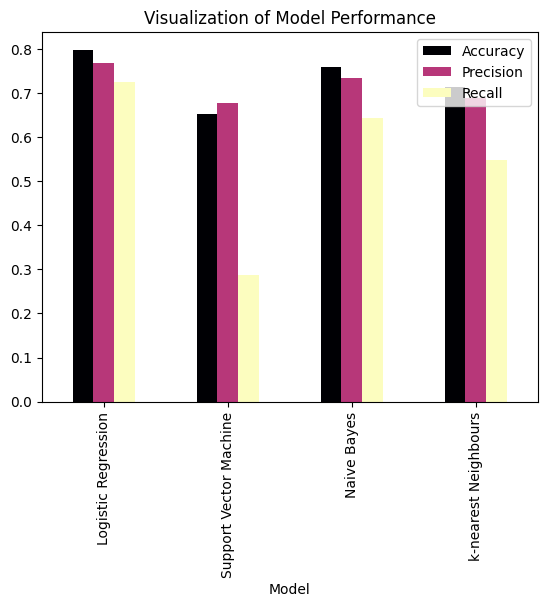

classification report
[[88 18]
 [28 45]]
Summary of all the Models
                    Model  Accuracy  Precision    Recall
0     Logistic Regression  0.798883   0.768116  0.726027
1  Support Vector Machine  0.653631   0.677419  0.287671
2             Naive Bayes  0.759777   0.734375  0.643836
3    k-nearest Neighbours  0.715084   0.689655  0.547945
4          Decision Trees  0.743017   0.714286  0.616438


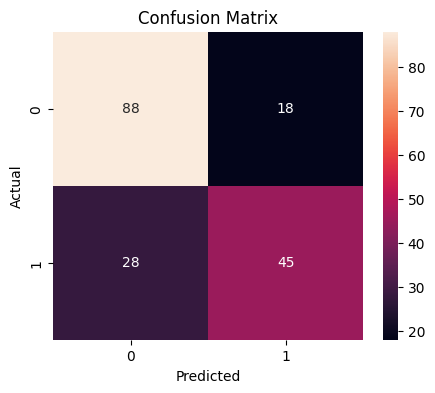

<Figure size 1200x800 with 0 Axes>

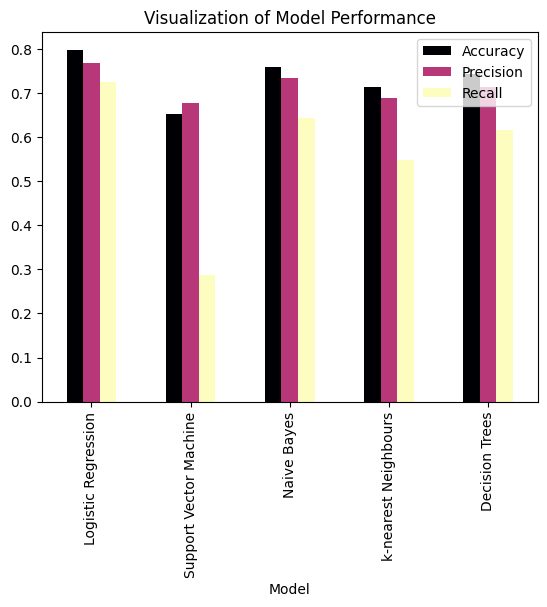

classification report
[[97  9]
 [30 43]]
Summary of all the Models
                    Model  Accuracy  Precision    Recall
0     Logistic Regression  0.798883   0.768116  0.726027
1  Support Vector Machine  0.653631   0.677419  0.287671
2             Naive Bayes  0.759777   0.734375  0.643836
3    k-nearest Neighbours  0.715084   0.689655  0.547945
4          Decision Trees  0.743017   0.714286  0.616438
5           Random Forest  0.782123   0.826923  0.589041


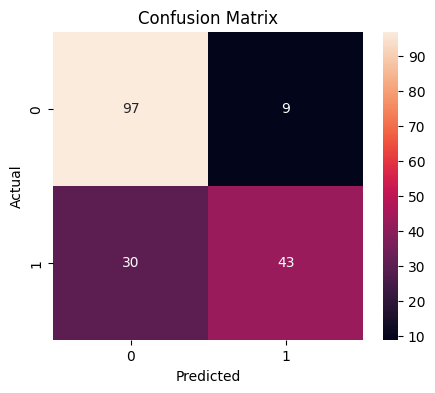

<Figure size 1200x800 with 0 Axes>

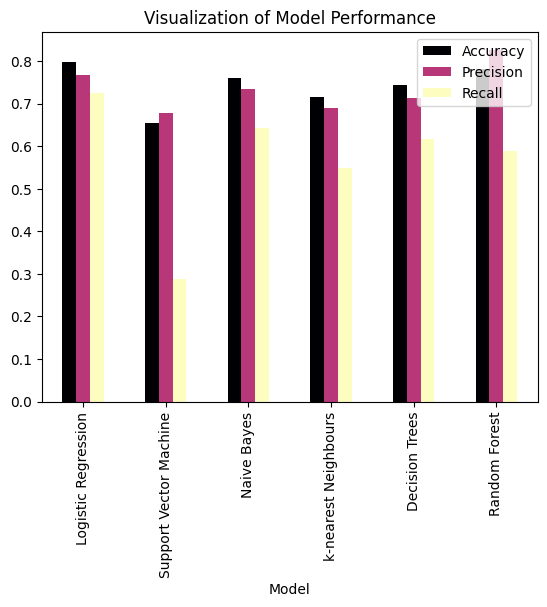

In [21]:
# Training and Evaluating the Model
results = []
for name,model in models.items():
  model.fit(X_train,y_train) # train model
  y_pred = model.predict(X_test)

  # classification report of all the ML Algorithms
  print("classification report")

  # Confusion matrix
  cm = confusion_matrix(y_test,y_pred)
  print(cm)

  # Performance parameters
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  recall = recall_score(y_test,y_pred)
  #f1 = f1_score(y_test,y_pred)

  results.append(
      {
          "Model": name,
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall" : recall,
          #"f1_score" : f1
      }
  )

  # Summary of the Model
  results_df = pd.DataFrame(results)
  print("Summary of all the Models")
  print(results_df)

  # Visualize the confusion matrix
  plt.figure(figsize = (5,4))
  sns.heatmap(cm,annot = True)
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

  # Visualize the comparison
  plt.figure(figsize = (12,8))
  results_df.set_index("Model")[["Accuracy","Precision","Recall",]].plot(kind = 'bar',cmap = "magma")
  plt.title("Visualization of Model Performance")
  plt.show()

In [22]:
joblib.dump(model,'titanic_model.pkl')
joblib.dump(scaler,'titanic_scaler.pkl')

NameError: name 'scaler' is not defined